# GPcounts applied to scRNA-Seq time series data

Nuha BinTayyash, 2020

GPcounts is a Gaussian process regression package for counts data with negative binomial and zero-inflated negative binomial likelihoods as described in the paper "Non-parametric modelling of temporal and spatial counts data from RNA-seq experiments".


This notebook shows how to fit GPcounts with zero-inflated negative binomial, negative binomial and Gaussian likelihoods using full inference on ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset to find differentially expressed genes using infer trajectory and compare it with GPcounts with sparse inferece to obtain to obtain computational efficiency.

In [1]:
import pandas as pd
import numpy as np
import gpflow 
from IPython.display import display

Load $\alpha$ gene expression data and pseudotime information

In [2]:
Y = pd.read_csv('../data/normalized_alpha_counts.csv',index_col=[0])
X = pd.read_csv('../data/alpha_time_points.csv',index_col=[0])

In [3]:
from GPcounts.GPcounts_Module import Fit_GPcounts
from helper import plot 

In [4]:
genes_name = ['ENSMUSG00000015879','ENSMUSG00000059173']

Probabilty of zeros in Fam184b and Pde1a genes

In [5]:
Y.loc[genes_name][Y.loc[genes_name] == 0].count(axis=1)/len(Y.columns)

ENSMUSG00000015879    0.859756
ENSMUSG00000059173    0.628049
dtype: float64

## 1. Fit GPcounts with different negative binomial likelihood assuming full inference on Fam184b and Pde1a genes

In [6]:
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],safe_mode = True) 
likelihoods = ['Zero_inflated_negative_binomial','Negative_binomial','Gaussian']

  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:43<00:43, 43.67s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [01:03<00:00, 31.56s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-354.496928,-357.560462,3.063534
ENSMUSG00000059173,-758.201393,-784.106171,25.904778


  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:01<00:01,  1.10s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


ENSMUSG00000015879


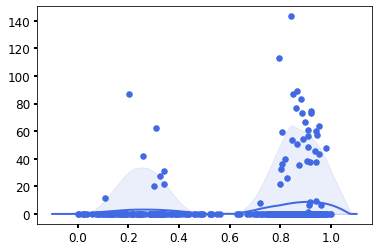

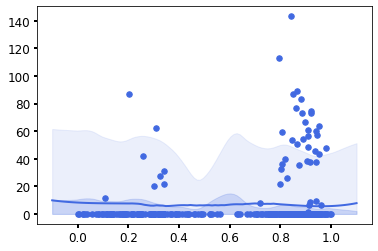

ENSMUSG00000059173


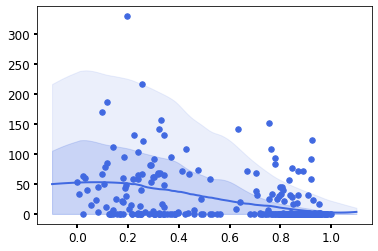

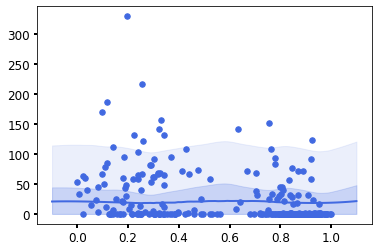

  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 32.89421085374665, 'km': 35.0}


 50%|█████     | 1/2 [00:04<00:04,  4.22s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 10.399752087571846, 'km': 35.0}


100%|██████████| 2/2 [00:10<00:00,  5.33s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-385.423242,-385.959712,0.536470
ENSMUSG00000059173,-797.366954,-807.318248,9.951293


  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:01<00:01,  1.43s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


ENSMUSG00000015879


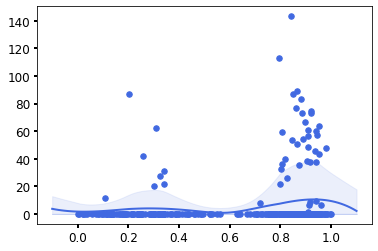

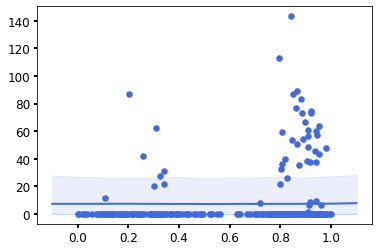

ENSMUSG00000059173


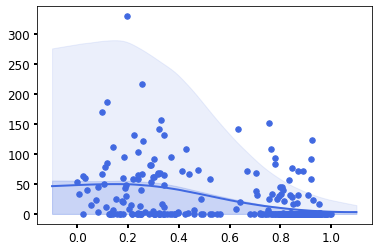

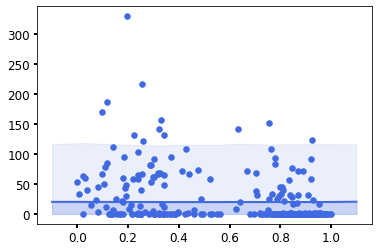

  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.3277138661248671, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:01<00:01,  1.23s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.7642028655075094, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-551.722537,-554.274201,2.551665
ENSMUSG00000059173,-623.552579,-663.040231,39.487652


 50%|█████     | 1/2 [00:00<00:00,  6.66it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:00<00:00,  5.84it/s]


{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
ENSMUSG00000015879


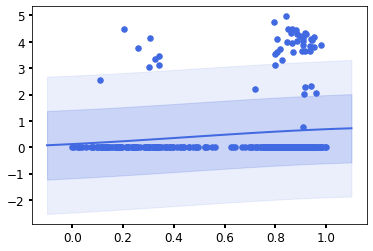

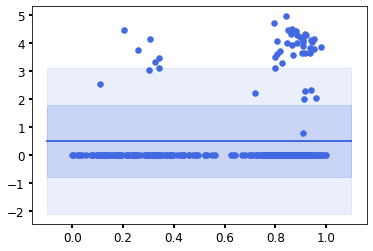

ENSMUSG00000059173


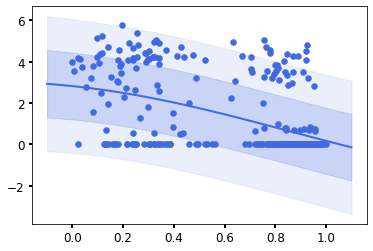

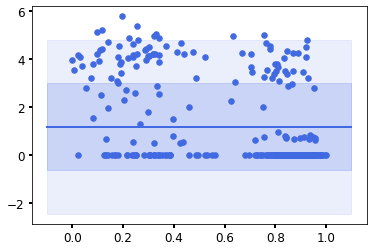

In [7]:
test_name = 'One_sample_test' # name of the test

for likelihood in likelihoods:
    results = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood)
    plot(params,X.values,Y.loc[genes_name])

## 2. Fit GPcounts with different likelihoods assuming sparse inference  to obtain computational efficiency  on Fam184b and Pde1a genes

  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:18<00:18, 18.17s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:22<00:00, 11.28s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-379.976966,-357.568811,0.00000
ENSMUSG00000059173,-783.575874,-784.107533,0.53166


  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:01<00:01,  1.41s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


ENSMUSG00000015879


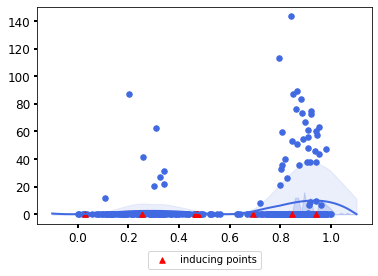

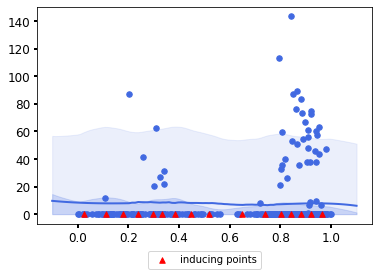

ENSMUSG00000059173


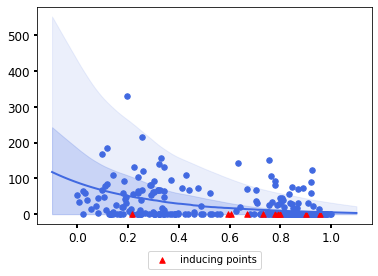

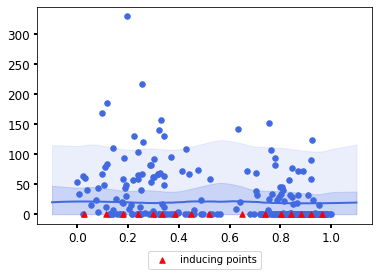

  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 35.55216321872914, 'km': 35.0}


 50%|█████     | 1/2 [00:04<00:04,  4.92s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 10.398896563987313, 'km': 35.0}


100%|██████████| 2/2 [00:08<00:00,  4.38s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-385.837692,-385.959709,0.122016
ENSMUSG00000059173,-797.367025,-807.318240,9.951216


  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:01<00:01,  1.17s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


ENSMUSG00000015879


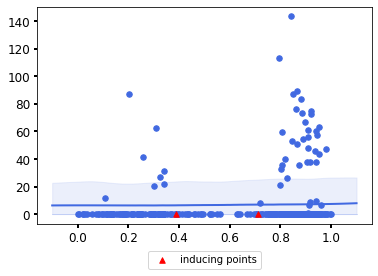

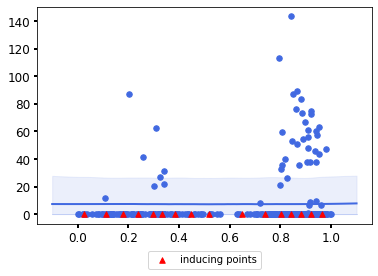

ENSMUSG00000059173


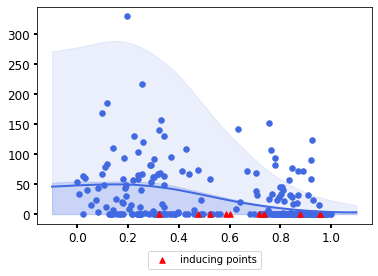

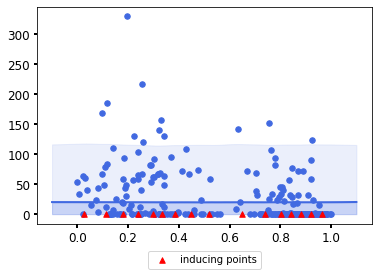

  0%|          | 0/2 [00:00<?, ?it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.3277138661248671, 'alpha': 1.0, 'km': 35.0}


 50%|█████     | 1/2 [00:01<00:01,  1.96s/it]

{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 0.7642028655075094, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-551.722597,-554.274207,2.551611
ENSMUSG00000059173,-623.552602,-663.040234,39.487632


 50%|█████     | 1/2 [00:00<00:00,  9.98it/s]

{'ls': 0.05, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 1.9535154797430865, 'alpha': 1.0, 'km': 35.0}
{'ls': 0.05, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}
{'ls': 1000.0, 'var': 4.7156660862377, 'alpha': 1.0, 'km': 35.0}


100%|██████████| 2/2 [00:00<00:00,  9.99it/s]


ENSMUSG00000015879


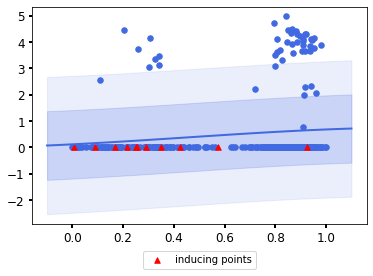

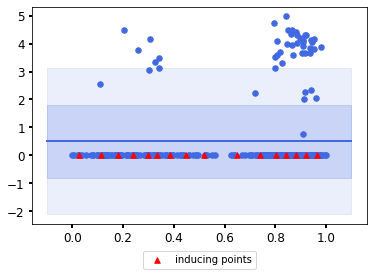

ENSMUSG00000059173


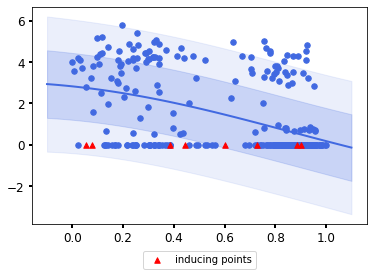

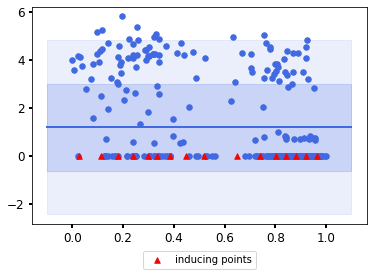

In [8]:
sparse = True 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],sparse = sparse,safe_mode = True) # use sparse inference

for likelihood in likelihoods:
    results_sparse = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results_sparse)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood)
    plot(params,X.values,Y.loc[genes_name],sparse)